<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/DeepPose_Human_Pose_Estimation_via_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DeepPose: Human Pose Estimation via Deep Neural Networks**

논문 링크: https://arxiv.org/abs/1312.4659

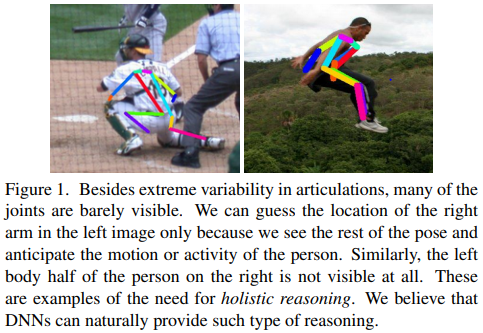

본 논문은 Pose Estimation 분야에서 최초로 Depp learning을 적용하한 논문이다. 해당 논문을 시작으로 본격적으로 딥러닝을 활용한 pose estimation이 등장하기 시작하였다.

CV 분야에서 CNN이 좋은 성능을 보이는 것은 잘 알려져 있지만, pose estimation 분야에서 특히 더욱 적합하다. 왜냐하면 keypoint detection 시에 image의 맥락을 파악하여 예측을 하기 때문에 각 관절(=keypoints) 사이의 관계를 학습할 수 있다.

## **DeepPose 구조**

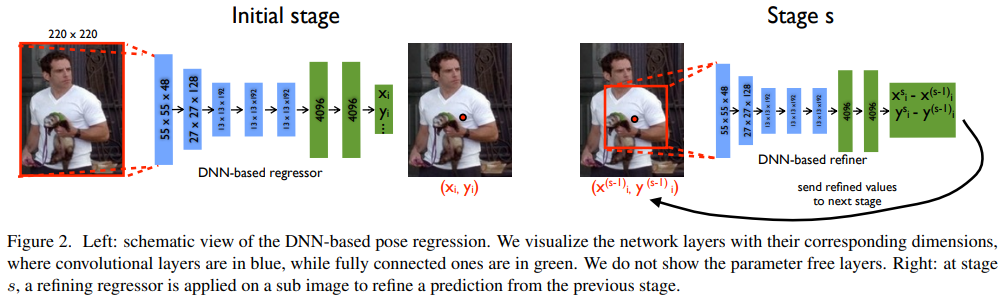

위의 그림 Figure 2를 보면 본 논문이 제시한 구조를 알 수 있다.

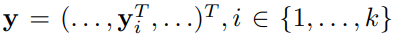

먼저, input image를 CNN에 통과시킨 후, 각 keypoint별로 x, y 좌표를 k개의 keypoint에 대해 예측값을 내며 이는 2k 차원의 벡터에 해당한다. 이를 식으로 나타낸 것이 바로 위의 식이다.

벡터 y_i는 i번째 관절의 좌표 x,y를 가진 2차원 벡터이다. 그리고 벡터 y는 2차원 벡터를 k개로 쭉 펼쳐 이어붙인 2k 차원의 벡터이다.

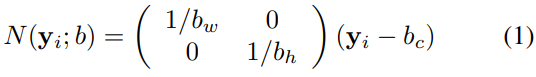

x, y 좌표를 바로 사용하기 전에 정규화 과정을 위의 식과 같이 거친다. 위 식에서 b는 bounding box를 의미하며, 여기선 image 전체 또는 사람만 detect한 region을 의미한다. b_c는 box의 center 좌표이며, b_w와 b_h는 각각 box의 너비와 높이다.

위의 식과 같이 각 keypoint의 x, y 좌표와 중심점 간의 차를 구하고 각각에 너비와 높이로 나누면 0 ~ 1사이의 값으로 정규화가 된다.

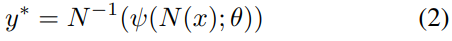

그리고 다시 image에 적용 시킬려면 위의 식과 같이 정규화 과정을 거꾸로 진행해주면 된다.

위의 식에서 x는 input image, φ는 CNN model을 통과시키는 함수, θ는 학습되는 parameter를 의미한다.

### **Cascade of Pose Regressors**

이렇게 구한 keypoints 값은 큰 image를 보고 예측한 것이기 때문에 정교함이 떨어지나. 따라서 예측 좌표 주변으로 bbox를 다시 그리고, 이를 crop하여 다시 CNN model에 통과시키는 Cascade 방식을 이용하기로 하였다.

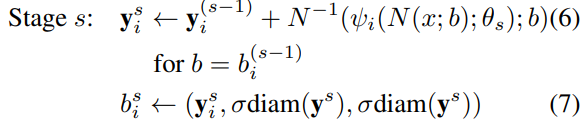

이를 식으로 나타내면 위와 같고, 위의 그림 Figure 2의 Stage s에 해당한다.

위의 식을 풀어 설명하자면, σdiam(y^s)라는 수식에 의해 모든 좌표들에 대한 bbox의 크기가 결정된다. diam()은 이전에 예측된 좌표들에서 왼쪽 어깨와 오른쪽 엉덩이 좌표간의 거리를 의미하며, σ는 이를 적당히 키워주는 hyper-parameter이다.

이렇게 구한 새로운 bbox로 다시 예측을 하는 것을 s단계만큼 반복하는 것이다.

### **Loss function**

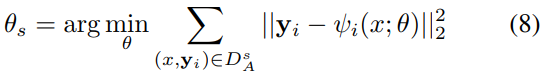

loss function은 특이할 것 없이 GT label 좌표와 예측 좌표의 L2 norm을 측정한다.

## **Experiments**

초기 논문이기 때문에 실험 결과도 간략하게 살펴보도록 하겠다.

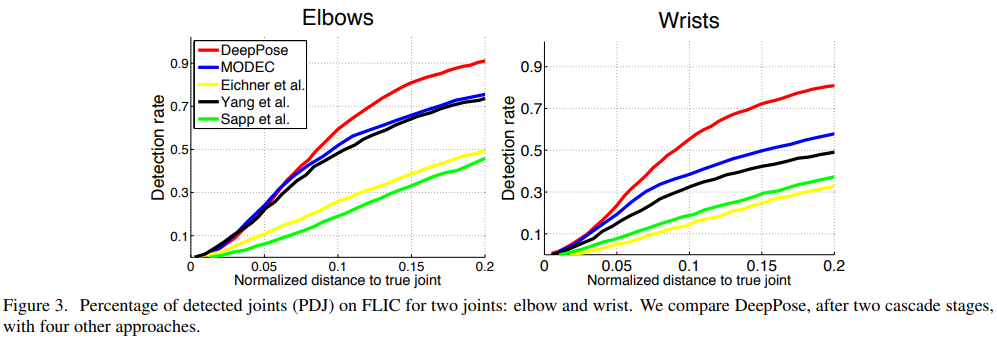

위의 그림 Figure 3은 성능지표 평가 방법 중 하나인 **PDJ(Percentage of Detected Joints)**를 사용해 FLIC dataset에 대해 비교를 진행한 것이다.

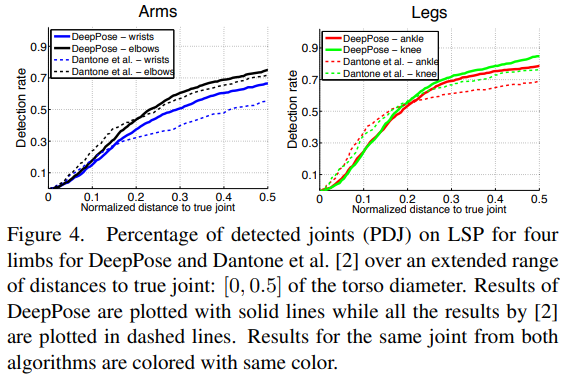

위의 그림 Figure 4 역시 Figure 3처럼 기존 알고리즘들에 대해 비교를 한 것이다. Figure 4에서는 LSP dataset을 사용했다.

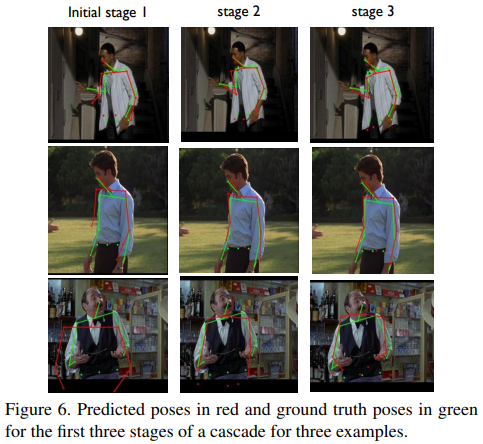

위의 그림 Figure 6을 보면 Cascade 기법을 활용해 stage가 깊어질수록 더욱 정교해진다는 것을 보여준다.

논문의 연도를 보면 알 수 있듯이 매우 초기 논문이기 때문에 여러 한계점이 많은 것이 사실이다. 예를 들어 먼저 keypoint를 예측할 때, keypoint 사이의 공간적 상관관계 정보를 고려하지 않기 때문에 image상에 보이지 않는 keypoint는 찾기 매우 어렵다. 또한, 원본 image에 대한 crop을 반복하고 각 단계별 CNN을 학습하기 때문에 비효율적이다.

마지막으로 regression만으로 문제를 해결하려는 것도 한계점이다. 이를 위해 추후에 heatmap 기반의 접근 방식이 등장하기도 한다.

어찌됬든 deep learning을 활용한 pose estimation의 시대를 열어준 논문인 점은 사실이다.